In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import BatchNormalization


In [8]:
df = pd.read_csv('AIA_Churn_Modelling_Case_Study.csv')
#print(df.keys())
print('Intial number of rows:', df.shape )

# remove the 'customerID' from the list.
df.drop(['customerID'],axis=1, inplace=True)

# replace the space with nan and remove the non from rows.
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
df = df[df['TotalCharges'].notnull()]
df['TotalCharges'] = df['TotalCharges'].astype(float)
print('Number of rows after removing empty spaces:', df.shape)

df.head()


Intial number of rows: (7043, 21)
Number of rows after removing empty spaces: (7032, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
from sklearn.preprocessing import StandardScaler

numeric_col = ['TotalCharges', 'MonthlyCharges', 'tenure']


df_std = pd.DataFrame(StandardScaler().fit_transform(df[numeric_col].astype('float64')),
                       columns=numeric_col)

dr22 = df.drop(['TotalCharges', 'MonthlyCharges', 'tenure'], axis=1)
df = pd.concat([df_std, dr22], axis=1, join='inner')
df = pd.get_dummies(df)

# Drop redundant columns (for features with two unique values)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No',
        'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No']

X, y = df.drop(drop,axis=1), df['Churn_Yes']
X.head()

,TotalCharges,MonthlyCharges,tenure,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.993984,-1.161743,-1.280278,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1,-0.173678,-0.260680,0.064180,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.959446,-0.363754,-1.239537,0,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
3,-0.195182,-0.747786,0.512333,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,-0.940257,0.196501,-1.239537,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0


In [61]:
X_train.shape[1]

40

In [83]:
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size=0.3,
                                    random_state=SEED)


# Set a random seed
n_inputs = X_train.shape[1]

# Return a new model with the given activation
 
model = Sequential()
model.add(Dense(n_inputs, input_shape=(n_inputs,), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(40, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 40)                1640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 40)                160       
_________________________________________________________________
dense_151 (Dense)            (None, 40)                1640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 40)                160       
_________________________________________________________________
dense_152 (Dense)            (None, 1)                 41        
Total params: 3,641
Trainable params: 3,481
Non-trainable params: 160
_________________________________________________________________


In [84]:
# Compile your model with adam and binary crossentropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [85]:

# Train for 100 epochs using a validation split of 0.2
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose= 0)


# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]


# Print accuracy
print('Accuracy:', accuracy)


2100/2100 [==============================] - 0s 41us/step
Accuracy: 0.773809552192688


In [86]:
# Predict on sensors_test and round up the predictions
preds = model.predict(X_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Rounded Predictions: 
 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]
2100/2100 [==============================] - 0s 32us/step
Accuracy: 0.773809552192688


# The history callback

The history callback is returned by default every time you train a model with the .fit() method. To access these metrics you can access the history dictionary inside the returned callback object and the corresponding keys.

We  store the model's historycallback and use the validation_data parameter as it trains.

We will plot the results stored in history with plot_accuracy() and plot_loss(), two simple matplotlib functions. We can check their code in the console by typing print(inspect.getsource(plot_loss)).

Let's see the behind the scenes of our training!

In [87]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()
    
def plot_accuracy(accuracy,val_accuracy):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(accuracy)
  plt.plot(val_accuracy)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

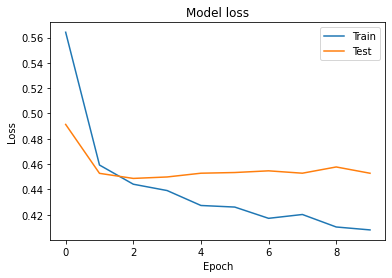

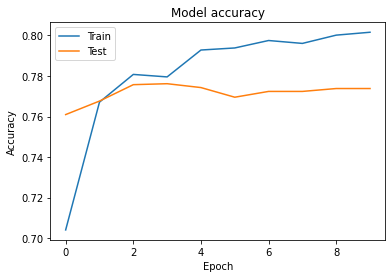

In [88]:
plot_loss(history.history['loss'], history.history['val_loss'])
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])

In [74]:
# Set a random seed
np.random.seed(1)
# Return a new model with the given activation
def get_model(act): 
    model = Sequential()
    model.add(Dense(n_inputs, input_shape=(n_inputs,), activation=act))
  #  model.add(Dense(64, input_shape=(20,), activation=act))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Activation functions to try
activations = ['relu', 'sigmoid', 'tanh']

# Loop over the activation functions
activation_results = {}

for act in activations:
    # Get a new model with the current activation
    model = get_model(act)
    # Fit the model
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose= 0)
    activation_results[act] = history
    
    
loss = {}
accuracy = {}
for act in activations:
    loss[act] = activation_results[act].history['loss']
    accuracy[act] = activation_results[act].history['accuracy']


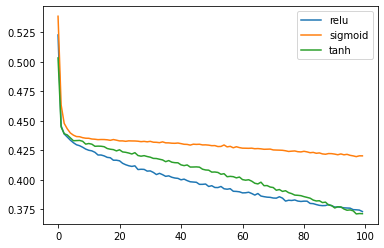

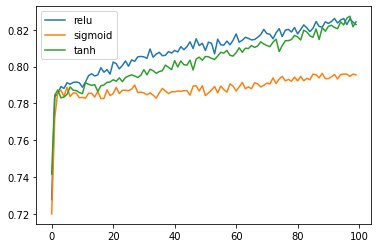

In [75]:
# Create a dataframe from val_loss_per_function
val_loss= pd.DataFrame(loss)

# Call plot on the dataframe
val_loss.plot()
plt.show()

# Create a dataframe from val_acc_per_function
val_acc = pd.DataFrame(accuracy)

# Call plot on the dataframe
val_acc.plot()
plt.show()

# Hyperparameter tuning

List of Neural network hyperparameters are:

Number of layers

Number of neurons per layer

Layer activations

Batch sizes

Learning rates

Optimizers

As an example we optimize the the learning_rate, epochs, batch_size, and activation functions.

In [95]:
import tensorflow
# Set a random seed
np.random.seed(1)
# Return a new model with the given activation

def create_model(learning_rate, activation): 
    opt = tensorflow.keras.optimizers.Adam(lr=learning_rate)
    model = Sequential()
    model.add(Dense(n_inputs, input_shape=(n_inputs,), activation=act))
    model.add(BatchNormalization())
    model.add(Dense(64, input_shape=(20,), activation=activation))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer= opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [96]:
# Import KerasClassifier from keras wrappers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model)

# Define the parameters to try out
params = {'activation':['relu', 'tanh'], 'batch_size':[32, 128, 256], 
          'epochs':[10, 20, 50], 'learning_rate':[0.1, 0.01, 0.001]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = 3)
random_search.fit(X_train, y_train, verbose= 0)

1633/1633 [==============================] - 0s 61us/step


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7efbea54f358>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'batch_size': [32, 128, 256],
                                        'epochs': [10, 20, 50],
                                        'learning_rate': [0.1, 0.01, 0.001]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [97]:
print(random_search.best_score_)
print(random_search.best_params_)

0.7711777885754904
{'learning_rate': 0.01, 'epochs': 10, 'batch_size': 256, 'activation': 'relu'}


In [ ]:
# Create a dataframe from val_loss_per_function
val_loss= pd.DataFrame(loss)

# Call plot on the dataframe
val_loss.plot()
plt.show()

# Create a dataframe from val_acc_per_function
val_acc = pd.DataFrame(accuracy)

# Call plot on the dataframe
val_acc.plot()
plt.show()